# 1. Time series manipulation

## 1.1. Datetime manipulation

In [2]:
import numpy as np
import pandas as pd

#### The standard datetime format
The complete datetime has the data type of `datetime64` and the format can be either `YYYY-MM-DD` or `YYYY-MM-DD hh:mm:ss`. This column can be used to detach year, quarter, month,... and the cyclic fields.

To quickly create a date or time column, use the `date_range()` function with the `freq` parameter indicating the frequency of the date column. Different aliases for `freq` can be found in the reference.

*Reference: [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)*

In [2]:
sequence = pd.date_range('2020-01-01', '2020-12-31', freq='MS')
pd.DataFrame({'date': sequence}).head()

,date
0,2020-01-01
1,2020-02-01
2,2020-03-01
3,2020-04-01
4,2020-05-01


In [6]:
sequence = pd.date_range('2020-01-01', '2020-12-31', freq='3h')
pd.DataFrame({'time': sequence}).head()

,time
0,2020-01-01 00:00:00
1,2020-01-01 03:00:00
2,2020-01-01 06:00:00
3,2020-01-01 09:00:00
4,2020-01-01 12:00:00


#### Useful techniques

In [9]:
df = pd.DataFrame({
    'day': [1, 2, 3],
    'month': [1, 1, 1],
    'year': [2020, 2020, 2020]
})

# combine three columns "day", "month" and "year"
df.assign(date=pd.to_datetime(df[['day', 'month', 'year']]))

,day,month,year,date
0,1,1,2020,2020-01-01
1,2,1,2020,2020-01-02
2,3,1,2020,2020-01-03


In [22]:
sequence = pd.date_range('2020-01-01', '2020-12-31', freq='17h 36t 43s')
df = pd.DataFrame({'time': sequence}).head()
df.assign(date=df.time.dt.date)

,time,date
0,2020-01-01 00:00:00,2020-01-01
1,2020-01-01 17:36:43,2020-01-01
2,2020-01-02 11:13:26,2020-01-02
3,2020-01-03 04:50:09,2020-01-03
4,2020-01-03 22:26:52,2020-01-03


#### Formatting date

In [6]:
df = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='25D')})
df.assign(date_print=df.date.dt.strftime('%d/%m/%y')).head()

,date,date_print
0,2020-01-01,01/01/20
1,2020-01-26,26/01/20
2,2020-02-20,20/02/20
3,2020-03-16,16/03/20
4,2020-04-10,10/04/20


#### Extracting date part

In [13]:
df = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})

df\
    .assign(year=df.date.dt.to_period('Y').astype(str))\
    .assign(quarter=df.date.dt.to_period('Q').astype(str).str.replace('Q', '-'))\
    .assign(month=df.date.dt.to_period('M').astype(str))\
    .assign(week=df.date.dt.strftime('%Y-%U'))

,date,year,quarter,month,week
0,2020-01-01 00:00:00,2020,2020-1,2020-01,2020-00
1,2020-03-10 10:40:00,2020,2020-1,2020-03,2020-10
2,2020-05-18 21:20:00,2020,2020-2,2020-05,2020-20
3,2020-07-27 08:00:00,2020,2020-3,2020-07,2020-30
4,2020-10-04 18:40:00,2020,2020-4,2020-10,2020-40
5,2020-12-13 05:20:00,2020,2020-4,2020-12,2020-50


#### Extracting cyclic attributes

In [3]:
df = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})

df\
    .assign(weekday=df.date.dt.day_name())\
    .assign(day_of_year=df.date.dt.dayofyear)\
    .assign(month_of_year=df.date.dt.month)\
    .assign(quarter_of_year=df.date.dt.quarter)

,date,weekday,day_of_year,month_of_year,quarter_of_year
0,2020-01-01 00:00:00,Wednesday,1,1,1
1,2020-03-10 10:40:00,Tuesday,70,3,1
2,2020-05-18 21:20:00,Monday,139,5,2
3,2020-07-27 08:00:00,Monday,209,7,3
4,2020-10-04 18:40:00,Sunday,278,10,4
5,2020-12-13 05:20:00,Sunday,348,12,4


#### Rounding date
The `freq` parameter of the `round()` method uses the same aliases mentioned earlier.

In [3]:
df = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})
df.assign(date_trunc=df.date.dt.round(freq='h'))

,date,date_trunc
0,2020-01-01 00:00:00,2020-01-01 00:00:00
1,2020-03-10 10:40:00,2020-03-10 11:00:00
2,2020-05-18 21:20:00,2020-05-18 21:00:00
3,2020-07-27 08:00:00,2020-07-27 08:00:00
4,2020-10-04 18:40:00,2020-10-04 19:00:00
5,2020-12-13 05:20:00,2020-12-13 05:00:00


In [6]:
df = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})
df.assign(date_trunc=df.date.dt.round(freq='T'))

,date,date_trunc
0,2020-01-01 00:00:00,2020-01-01 00:00:00
1,2020-03-10 10:40:00,2020-03-10 10:40:00
2,2020-05-18 21:20:00,2020-05-18 21:20:00
3,2020-07-27 08:00:00,2020-07-27 08:00:00
4,2020-10-04 18:40:00,2020-10-04 18:40:00
5,2020-12-13 05:20:00,2020-12-13 05:20:00


However, the `round()` method only works with fixed frequencies such as hour, minute, second. For rounding to date or month, use the `to_period` method.

In [24]:
df = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})
df.assign(date_trunc=df.date.dt.to_period('M').dt.to_timestamp())

,date,date_trunc
0,2020-01-01 00:00:00,2020-01-01
1,2020-03-10 10:40:00,2020-03-01
2,2020-05-18 21:20:00,2020-05-01
3,2020-07-27 08:00:00,2020-07-01
4,2020-10-04 18:40:00,2020-10-01
5,2020-12-13 05:20:00,2020-12-01


#### Timedelta

In [ ]:
delta = pd.DataFrame({
    'date1': pd.date_range('2020-01-01', '2020-01-31', freq='3D'),
    'date2': pd.date_range('2020-01-02', '2020-03-15', freq='W')
})
delta

In [ ]:
delta['timedelta'] = delta.date2 - delta.date1
delta

In [ ]:
delta['date3'] = delta.date1 + pd.Timedelta('15 days')
delta

## 1.2. Time series filling
A time series may have no existing blank value, however, it doesn't mean that date column is completed. A completed time series requires all data points to be equally spaced. In other words, the date or time frequency should be a constant across the dataset. Interpolation (the process of inferring new values from given ones) is a great techinque filling missing time series.

In [9]:
import numpy as np
import pandas as pd

In [26]:
df = pd.DataFrame({
    'date': pd.to_datetime([
        '2020-01-01', '2020-01-03', '2020-01-04', '2020-01-05',
        '2020-01-06', '2020-01-07', '2020-01-09', '2020-01-10'
    ]),
    'price': [110, 113, 112, 115, 118, 120, 118, 116]
})
df

,date,price
0,2020-01-01,110
1,2020-01-03,113
2,2020-01-04,112
3,2020-01-05,115
4,2020-01-06,118
5,2020-01-07,120
6,2020-01-09,118
7,2020-01-10,116


#### Unhiding missing time series

In [11]:
df = df.set_index('date').asfreq('d').reset_index()
df

,date,price
0,2020-01-01,110.0
1,2020-01-02,NaN
2,2020-01-03,113.0
3,2020-01-04,112.0
4,2020-01-05,115.0
5,2020-01-06,118.0
6,2020-01-07,120.0
7,2020-01-08,NaN
8,2020-01-09,118.0
9,2020-01-10,116.0


#### Foward filling

In [12]:
filled_values = df.price.fillna(method='ffill')
df.assign(price=filled_values)

,date,price
0,2020-01-01,110.0
1,2020-01-02,110.0
2,2020-01-03,113.0
3,2020-01-04,112.0
4,2020-01-05,115.0
5,2020-01-06,118.0
6,2020-01-07,120.0
7,2020-01-08,120.0
8,2020-01-09,118.0
9,2020-01-10,116.0


#### Backward filling

In [27]:
filled_values = df.price.fillna(method='bfill')
df.assign(price=filled_values)

,date,price
0,2020-01-01,110
1,2020-01-03,113
2,2020-01-04,112
3,2020-01-05,115
4,2020-01-06,118
5,2020-01-07,120
6,2020-01-09,118
7,2020-01-10,116


#### Linear interpolating

In [13]:
filled_values = df.price.interpolate(method='linear')
df.assign(price=filled_values)

,date,price
0,2020-01-01,110.0
1,2020-01-02,111.5
2,2020-01-03,113.0
3,2020-01-04,112.0
4,2020-01-05,115.0
5,2020-01-06,118.0
6,2020-01-07,120.0
7,2020-01-08,119.0
8,2020-01-09,118.0
9,2020-01-10,116.0


## 1.3. Time series calculation

In [1]:
import pandas as pd
import numpy as np

#### Cumulative sum
Cumulative sum is the discrete version of antiderivative.

In [8]:
purchase = pd.DataFrame({
    'date': pd.date_range(start='1/1/2000', periods=12),
    'quantity': [10, 13, 11, 12, 8, 9, 9, 11, 10, 11, 13, 14]
})

purchase['quantity_cumulative'] = purchase.quantity.cumsum()
purchase

,date,quantity,quantity_cumulative
0,2000-01-01,10,10
1,2000-01-02,13,23
2,2000-01-03,11,34
3,2000-01-04,12,46
4,2000-01-05,8,54
5,2000-01-06,9,63
6,2000-01-07,9,72
7,2000-01-08,11,83
8,2000-01-09,10,93
9,2000-01-10,11,104


#### Differencing
Differencing is the discrete version of derivative.

In [1]:
import numpy as np
import pandas as pd

In [2]:
purchase = pd.DataFrame({
    'date': pd.date_range(start='1/1/2000', periods=12),
    'quantity': [10, 13, 11, 12, 8, 9, 9, 11, 10, 11, 13, 14]
})

purchase['quantity_difference'] = purchase.quantity.diff(periods=1)
purchase

,date,quantity,quantity_difference
0,2000-01-01,10,NaN
1,2000-01-02,13,3.0
2,2000-01-03,11,-2.0
3,2000-01-04,12,1.0
4,2000-01-05,8,-4.0
5,2000-01-06,9,1.0
6,2000-01-07,9,0.0
7,2000-01-08,11,2.0
8,2000-01-09,10,-1.0
9,2000-01-10,11,1.0


#### Rolling mean
Given a series (which has $n$ observations), we calculate the average of each window of size $k$. A window of size $k$ means $k$ consecutive values. Rolling mean is used on time series data to smooth the short-term fluctuations and highlight long-term trends and cycles. Some examples of $k$:
- For a date series, $k=7$ (weekly) or $k=30$ (monthly) may be used.
- For a month series, $k=4$ (quarterly) or $k=12$ (annual) my be used.

In [ ]:
import numpy as np
import pandas as pd

In [12]:
rate = pd.read_excel(r'data\exchage_rate.xlsx')

rate['rate_smooth'] = rate.rate.rolling(window=7, center=True).mean()
rate

,date,rate,rate_smooth
0,2020-02-01,23170.5,NaN
1,2020-02-02,23170.5,NaN
2,2020-02-03,23170.5,NaN
3,2020-02-04,23170.5,23172.285714
4,2020-02-05,23170.5,23179.785714
5,2020-02-06,23170.5,23192.571429
6,2020-02-07,23183.0,23202.500000
7,2020-02-08,23223.0,23209.714286
8,2020-02-09,23260.0,23217.071429
9,2020-02-10,23240.0,23225.928571


**Note:** There will be $n-(k-1)$ rolling mean points and $k-1$ null values. Therefore if $k$ is even, you cannot center the rolling mean. To avoid this problem, we calculate the rolling mean once again.

In [13]:
rate = pd.read_excel(r'data\exchage_rate.xlsx')

rate['rate_smooth'] = rate.rate.rolling(window=6, center=True).mean().rolling(window=2).mean().shift(-1)
rate

,date,rate,rate_smooth
0,2020-02-01,23170.5,NaN
1,2020-02-02,23170.5,NaN
2,2020-02-03,23170.5,NaN
3,2020-02-04,23170.5,23171.541667
4,2020-02-05,23170.5,23176.958333
5,2020-02-06,23170.5,23188.791667
6,2020-02-07,23183.0,23202.041667
7,2020-02-08,23223.0,23212.041667
8,2020-02-09,23260.0,23220.541667
9,2020-02-10,23240.0,23228.958333


#### Growth rate

In [2]:
import numpy as np
import pandas as pd

In [3]:
cpi = pd.DataFrame({
    'quarter': [f'{year} Q{quarter}' for year in range(2017,2020) for quarter in range(1,5)],
    'cost': [111.63, 112.23, 112.68, 113.10, 114.10, 115.28, 115.66, 115.59, 115.98, 117.37, 117.69, 117.94]
})

cpi['growth_over_last_period'] = cpi.cost.pct_change().map('{:.2%}'.format)
cpi['growth_over_same_period_last_year'] = cpi.cost.pct_change(periods=4).map('{:.2%}'.format)
cpi

,quarter,cost,growth_over_last_period,growth_over_same_period_last_year
0,2017 Q1,111.63,nan%,nan%
1,2017 Q2,112.23,0.54%,nan%
2,2017 Q3,112.68,0.40%,nan%
3,2017 Q4,113.10,0.37%,nan%
4,2018 Q1,114.10,0.88%,2.21%
5,2018 Q2,115.28,1.03%,2.72%
6,2018 Q3,115.66,0.33%,2.64%
7,2018 Q4,115.59,-0.06%,2.20%
8,2019 Q1,115.98,0.34%,1.65%
9,2019 Q2,117.37,1.20%,1.81%


# 2. Time series models

## 2.1. ARIMA

#### AR(p)
*AR(p)- Auto regression model at lag $p$*. In an autoregression model, the variable $y_t$ is estimated by using a linear combination of past values of the variable.

$$y_t = c + \phi_1 y_{t−1} + \phi_2 y_{t−2}+ \dots + \phi_p y_{t−p}+\epsilon_t$$

*Partial auto correlation function*: PACF is real correlations between time spots, it means PACF calculated the correlation between $y_t$ and $y_{t-p}$, ignore the correlation between p $y$ in the middle 

The lag $p$ is determined base on PACF chart: PACF of $AR(p)$ model will equal to 0 with all lag greater than $p$ (usually $p = 1$)

#### MA(q)
*MA(q) - Moving average model* uses past forecast errors in a regression-like model.

$$y_t = c+ \epsilon_t+\theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2}+ \dots +\theta_q\epsilon_{t-q}$$

*Auto correlation function*: ACF is the correlation between vector $y_t$ and vector $y$ at lags. 

*The lag $q$* is determined base on ACF chart: exactly like PACF chart.
    

#### I(d)
*I(d) - difference d times* of time series. If the time series is stationary at ordiginal series then $d=0$.

A stationary time series is one whose properties do not depend on the time at which the series is observed (mean, variance, covariance at all time are constant). If the time series is non-stationary then we need to compute the differences between consecutive observations. This is called differencing.

#### ARIMA function

Combine the AR model, MA model and I, we have ARIMA model:
$$y′_t = c + \phi_1 y′_{t−1}+\dots+\phi_p y′_{t−p}+\theta_1 \epsilon_{t-1}+\dots+\theta_q \epsilon_{t−q}+\epsilon_t$$

ARIMA estimated the parameters based on `maximum likelihood estimation` - means choosing the parameters for minimum the variance of error. But MLE can lead to add too much parameter to model (overfitting). Then *AIC measure* can be used:
$$\mbox{AIC}=−2log(L)+2(p+q+k+1)$$

#### Seasonal
 
SARIMA model: $\mbox{ARIMA} (p,d,q) x (P,D,Q)_m$
 - $(p,d,q)$ -> non - seasonal part
 - $(P,D,Q)_m$ -> seasonal - part

$P,D,Q$ are determined likes $p,d,q$ - use ACF and PACF.\
VD: $\mbox{ARIMA}_{(0,0,0)x(0,0,1)_{12}}$ will have ACF chart peak at lag 12 and equal to 0 at other lags.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [54]:
quantity = pd.read_excel('data/purchase_quantity.xlsx')
quantity.head()

,quantity,date
0,379.49,2019-10-28
1,669.51,2019-10-29
2,337.17,2019-10-30
3,603.74,2019-10-31
4,189.82,2019-11-01


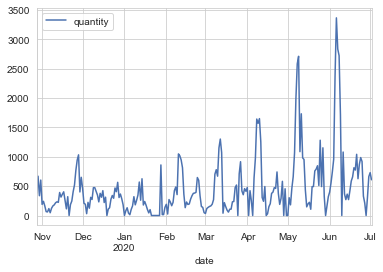

In [55]:
quantity = quantity.set_index('date')
quantity.plot()
plt.show()

In [56]:
stationary1 = adfuller(quantity['quantity'], regression='nc')
print(f'ADF Statistic: {stationary1[0]}')
print(f'p-value: {stationary1[1]}')

ADF Statistic: -1.3734851055507937
p-value: 0.15759354748986681


In [57]:
quan_dif = quantity.diff().dropna()

In [58]:
stationary2 = adfuller(quan_dif['quantity'], regression='nc')
print(f'ADF Statistic: {stationary2[0]}')
print(f'p-value: {stationary2[1]}')

ADF Statistic: -8.434541493283252
p-value: 3.33871814656407e-14


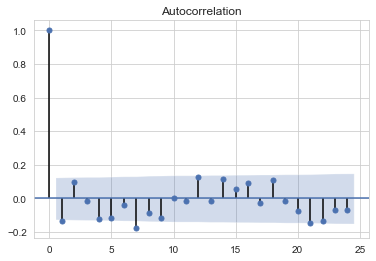

In [59]:
plot_acf(quan_dif)
plt.show()

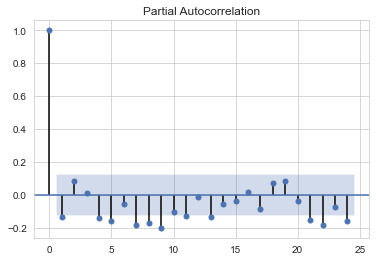

In [60]:
plot_pacf(quan_dif)
plt.show()

In [61]:
sarima = SARIMAX(quantity, order=(0,1,0), seasonal_order=(0,1,1,30), trend='t').fit()
print(sarima.summary())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                             quantity   No. Observations:                  249
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 30)   Log Likelihood               -1610.530
Date:                              Sun, 01 Nov 2020   AIC                           3227.061
Time:                                      10:24:34   BIC                           3237.214
Sample:                                  10-28-2019   HQIC                          3231.162
                                       - 07-02-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0006      0.064      0.009      0.993      -0.125       0.126
ma.S.L30      -0.71

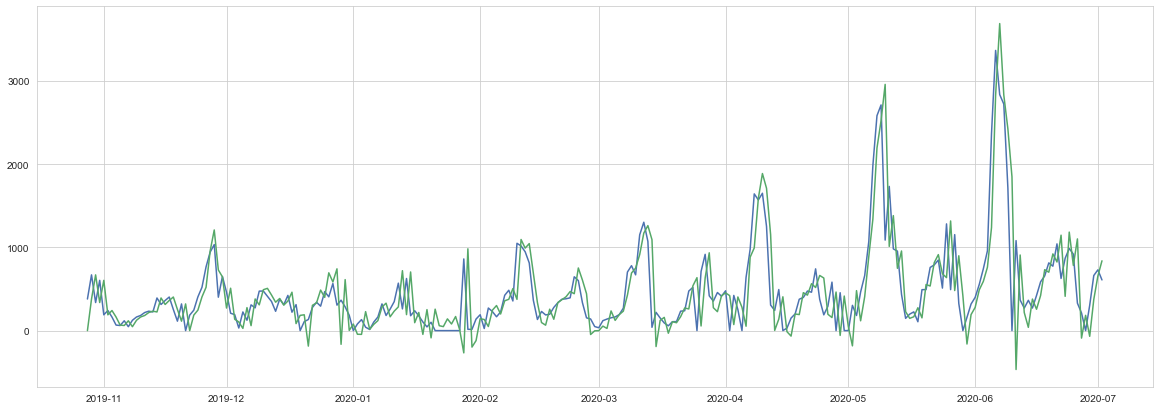

In [62]:
fitted = sarima.predict(n_periods=249)
fitted_series = pd.Series(fitted, index=quantity.index)

plt.figure(figsize=(20,7))
plt.plot(quantity)
plt.plot(fitted_series)
plt.show()

## 2.2. Holt-Winter

A method estimated time series based on weight average the past values

#### Smoothing level ($\alpha$)

$\alpha$ is the parameter which smooth the time series. $\alpha$ is close to 1 means the smoothed series is more like orginal series and opposite
\begin{equation}
  \hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2}+ \cdots,   
\end{equation}

Components form:

\begin{align*}
  \text{Forecast equation}  && \hat{y}_{t+h|t} & = \ell_{t}\\
  \text{Smoothing equation} && \ell_{t}        & = \alpha y_{t} + (1 - \alpha)\ell_{t-1},
\end{align*}

In $\ell_t$ equation, we need $\alpha$ and $\ell_{t-1}$ - called *initial value*. $\alpha$ and $\mbox{initial value}$ are estimated to minimum SSE.

#### Smoothing slope ($\beta$)

\begin{align*}
  \text{Forecast equation}&& \hat{y}_{t+h|t} &= \ell_{t} + hb_{t} \\
  \text{Level equation}   && \ell_{t} &= \alpha y_{t} + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  \text{Trend equation}   && b_{t}    &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)b_{t-1},
\end{align*}

- $\ell_{t}$ : an estimate of the level of the series at time $t$
- $b_{t}$ : an estimate of the trend (slope) of the series at time $t$
- $\beta^*$: smoothing parameter for the trend
- $b_{t-1}$: initial value of trend

#### Damped Trend ($\phi$)

Orginal trend will be linear shape but in some case, the trend is downward curve form and it called *damping*. Then we add $y_t$ - damping parameter into the model

\begin{align*}
  \hat{y}_{t+h|t} &= \ell_{t} + (\phi+\phi^2 + \dots + \phi^{h})b_{t} \\
  \ell_{t} &= \alpha y_{t} + (1 - \alpha)(\ell_{t-1} + \phi b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)\phi b_{t-1}.
\end{align*}

- If $\phi$ = 1 then the trend is linear
- 0<$\phi$<1 then the trend is reduce to a constant in the future.

#### Smoothing seasonal ($\gamma$)

- Holt-winter's additive method: The seasonal part is the difference between $y_t$ and $\ell_t$

\begin{align*}
  \hat{y}_{t+h|t} &= \ell_{t} + hb_{t} + s_{t+h-m(k+1)} \\
  \ell_{t} &= \alpha(y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1}\\
  s_{t} &= \gamma (y_{t}-\ell_{t-1}-b_{t-1}) + (1-\gamma)s_{t-m},
\end{align*}

- Holt-winter's multiplicative method: The seasonal part is  $\ell_t$ didived by $y_t$

\begin{align*}
  \hat{y}_{t+h|t} &= (\ell_{t} + hb_{t})s_{t+h-m(k+1)} \\
  \ell_{t} &= \alpha \frac{y_{t}}{s_{t-m}} + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t}-\ell_{t-1}) + (1 - \beta^*)b_{t-1}                \\
  s_{t} &= \gamma \frac{y_{t}}{(\ell_{t-1} + b_{t-1})} + (1 - \gamma)s_{t-m}
\end{align*}

$s_{t}$ : Estimated of seasonal part at the times $t$\
$\gamma$ : Smoothing seasonal. The less $\gamma$ the less change in seasonal by the times.\
$s_{t-m}$ : Initial value of seasonal. The numbers of initial values depend on the numbers of seasonal.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')
from statsmodels.tsa.holtwinters import ExponentialSmoothing as es

In [64]:
quantity = pd.read_excel('data/purchase_quantity.xlsx')
quantity.head()

,quantity,date
0,379.49,2019-10-28
1,669.51,2019-10-29
2,337.17,2019-10-30
3,603.74,2019-10-31
4,189.82,2019-11-01


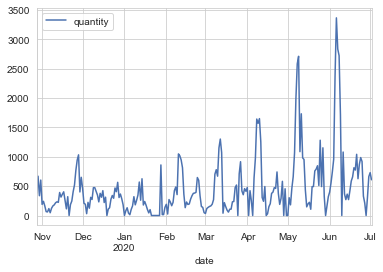

In [65]:
quantity = quantity.set_index('date')
quantity.plot()
plt.show()

In [66]:
model_hw = es(quantity, trend='add', damped=True, seasonal='add', seasonal_periods=30).fit()
model_hw.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


Dep. Variable:,endog,No. Observations:,249
Model:,ExponentialSmoothing,SSE,26733064.086
Optimized:,True,AIC,2954.406
Trend:,Additive,BIC,3077.517
Seasonal:,Additive,AICC,2967.733
Seasonal Periods:,30,Date:,"Sun, 01 Nov 2020"
Box-Cox:,False,Time:,10:24:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2028375,alpha,True
smoothing_slope,3.0444e-28,beta,True


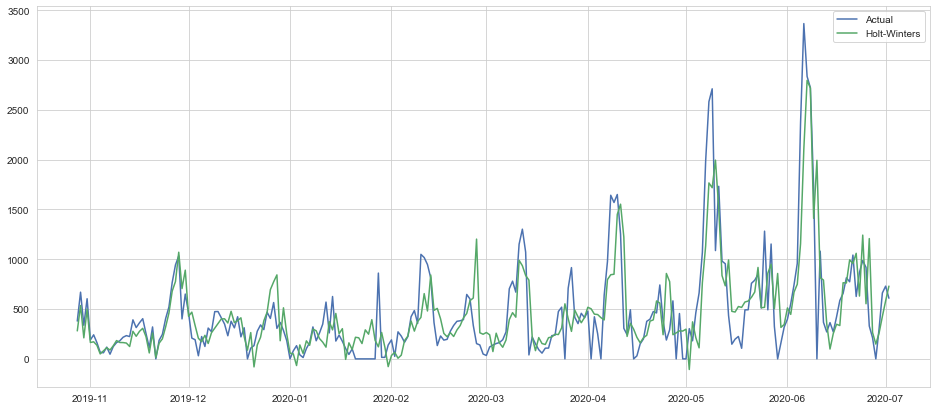

In [67]:
pred = model_hw.predict(start=quantity.index[0], end=quantity.index[-1])

plt.figure(figsize=(16,7))
plt.plot(quantity.index, quantity, label='Actual')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

## 2.3. VAR Model

A VAR model is a generalisation of the univariate autoregression model for forcasting a vector of time series. In VAR model, all variables are treated symmetrically - all of them are `endogenous`. The structure of VAR is each variable is a linear function of past lags of itself and past lags of the other variables.

*Explaination:*

Example with 2 variables:
$$a_t = c_1 + \sum_{j=1}^{j=p} A_j a_{t-j} + \sum_{j=1}^{j=p} B_j b_{t-j} + e_{1,t} \\
  b_t = c_2 + \sum_{j=1}^{j=p} D_j a_{t-j} + \sum_{j=1}^{j=p} E_j b_{t-j} + e_{2,t}$$
  
- Two equations contains only its own lagged values and the lagged value of others variables - no current values of two variables on right-hand sides.
- Although the number of lagged values of each variable can be different, in most cases we use the same number of lagged terms in each equation.
- The model above is called $\mbox{VAR(p)}$ because of $p$ lagged values of each variable. 

*The general form of VAR: The function of VAR is actually the OLS method with stationary time series*:

$$y_t = c + A_1 y_{t-1} + A_2 y_{t-2}+\cdots +A_p y_{t-p}+e_{t}$$

$A_i$: Square matrix $m*m, i=1,2,\dots,p$\
$y_t$: $m$ stationary variables $y_{1t}, y_{2t},\dots, y_{mt}$\
$e_t$: vector of white noise

*The work flow:*

Step 1: Check the stationary of all time series. We have 2 possibilities:
- If all variables are stationary, we can estimated VAR model by OLS
- If all variables are I(1), make them stationary and move to step 2:

Step 2: Find the lag $p$ for model. Depend on metric $\mbox{AIC}$, $\mbox{FPE}$, $\mbox{SC}$ and $\mbox{HQIC}$ - The lag reach the largest numbers of minimum metrics will be the lag for model.

Step 3: Estimated the VAR model by OLS.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

In [69]:
cpi = pd.read_excel('data/cpi.xlsx')
cpi = cpi.set_index('year')

cpi.head()

,ex_rate,money_supply,inf
year,,,
2009-01-01,16954,1.582872e+06,15.536579
2009-02-01,16953,1.722413e+06,6.701754
2009-03-01,16991,1.830077e+06,2.417558
2009-04-01,17941,1.914078e+06,4.602838
2009-05-01,18544,1.964660e+06,9.696635


In [70]:
for i in cpi.columns:
    test = adfuller(cpi[i])
    print(f'ADF of {i}: {test[0]}')
    print(f'p-value of {i}: {test[1]}')

ADF of ex_rate: -2.6047933525515283
p-value of ex_rate: 0.09201062038116359
ADF of money_supply: 3.8579852540227413
p-value of money_supply: 1.0
ADF of inf: -1.5541069718149612
p-value of inf: 0.5065960721917752


In [71]:
cpi_dif = cpi.diff().dropna()

for i in cpi_dif.columns:
    test = adfuller(cpi_dif[i])
    print(f'ADF of {i}: {test[0]}')
    print(f'p-value of {i}: {test[1]}')

ADF of ex_rate: -6.723311823514878
p-value of ex_rate: 3.4392095149141533e-09
ADF of money_supply: -4.971584105329943
p-value of money_supply: 2.5253803145699296e-05
ADF of inf: -5.335877955147655
p-value of inf: 4.6124289217500115e-06


In [72]:
var = VAR(cpi_dif)
result = var.fit(maxlags=4, ic='aic', verbose=True)
result.summary()

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 1, FPE -> 4, HQIC -> 1>
Using 4 based on aic criterion


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 01, Nov, 2020
Time:                     10:24:40
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    37.1056
Nobs:                     39.0000    HQIC:                   36.0390
Log likelihood:          -818.136    FPE:                2.67178e+15
AIC:                      35.4421    Det(Omega_mle):     1.12716e+15
--------------------------------------------------------------------
Results for equation ex_rate
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                 171.053850       261.584879            0.654           0.513
L1.ex_rate             -0.126433         0.163305           -0.774           0.439
L1.money_supply        -0.000224         0.000543 

In [73]:
lags = result.k_ar

inf_pred = result.forecast(cpi_dif[-lags:].values, steps=15)[:,2:3]
inf_pred = cpi['inf'].iloc[-1] + inf_pred.cumsum()
inf_pred

array([3.23590418, 3.29835561, 3.04879665, 3.49792176, 3.63751891,
       3.59901505, 3.78114786, 3.67908554, 3.62580333, 3.81903495,
       3.86660551, 3.88287442, 3.93823976, 3.89078186, 3.8963528 ])

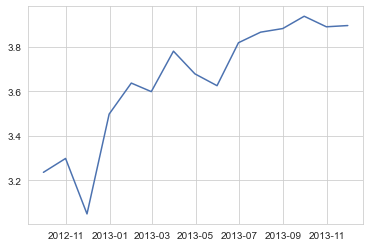

In [74]:
date = pd.date_range(start='2012-09-01', periods=15, freq='M')
pred = pd.DataFrame(inf_pred, index=date, columns=['inf'])

plt.plot(pred)

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*